In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

In [2]:
agro = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin-1')


In [3]:
agro.info(), agro.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

(None,
           Area  Year  Savanna fires  Forest fires  Crop Residues  \
 0  Afghanistan  1990        14.7237        0.0557       205.6077   
 1  Afghanistan  1991        14.7237        0.0557       209.4971   
 2  Afghanistan  1992        14.7237        0.0557       196.5341   
 3  Afghanistan  1993        14.7237        0.0557       230.8175   
 4  Afghanistan  1994        14.7237        0.0557       242.0494   
 
    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
 0            686.00                          0.0                 11.807483   
 1            678.16                          0.0                 11.712073   
 2            686.00                          0.0                 11.712073   
 3            686.00                          0.0                 11.712073   
 4            705.60                          0.0                 11.712073   
 
    Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
 0         63.1152 

In [4]:
agro.isnull().sum()

,0
Area,0
Year,0
Savanna fires,31
Forest fires,93
Crop Residues,1389
Rice Cultivation,0
Drained organic soils (CO2),0
Pesticides Manufacturing,0
Food Transport,0
Forestland,493


In [5]:
agro_cleaned = agro.dropna()
agro_cleaned.shape

(4546, 31)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [7]:
X = agro_cleaned.drop(columns=['Average Temperature °C', 'Area'])  # Drop target and non-numeric Area
y = agro_cleaned['Average Temperature °C']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Build the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr_model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
evaluation_results = {
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}

In [13]:
import pandas as pd
eval_df = pd.DataFrame(evaluation_results, index=["Linear Regression"])

In [14]:
# Display evaluation results
print("Linear Regression Model Evaluation Metrics:")
print(eval_df)

# Get feature coefficients
coefficients = lr_model.coef_
feature_names = X_train.columns

# Create a DataFrame for features and coefficients
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value and get top 10
top_features = features_df.reindex(features_df['Coefficient'].abs().sort_values(ascending=False).index)[:10]


# Display top 10 features
print("\nTop 10 Most Influential Features:")
print(top_features[['Feature', 'Coefficient']])

Linear Regression Model Evaluation Metrics:
                   Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
Linear Regression                   0.367443                  0.231827   

                   Root Mean Squared Error (RMSE)  R² Score  
Linear Regression                        0.481484  0.324677  

Top 10 Most Influential Features:
                            Feature  Coefficient
0                              Year     0.037878
18          Manure applied to Soils     0.000071
6          Pesticides Manufacturing    -0.000046
3                     Crop Residues     0.000022
11                      Food Retail    -0.000018
2                      Forest fires    -0.000014
16        Fertilizers Manufacturing    -0.000014
19           Manure left on Pasture    -0.000012
7                    Food Transport     0.000010
22  Fires in humid tropical forests     0.000008


In [15]:
#decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [16]:
agro_cleaned = agro.dropna()

# Step 4: Define features (X) and target (y)
X = agro_cleaned.drop(columns=['Average Temperature °C', 'Area'])  # Drop non-numeric columns
y = agro_cleaned['Average Temperature °C']

# Step 5: Bin target into 3 quantile-based classes (for resampling strategy)
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_binned = binning.fit_transform(y.values.reshape(-1, 1)).ravel()

# Step 6: SMOTE - Oversampling
smote = SMOTE(random_state=42)
X_os, y_os_binned = smote.fit_resample(X, y_binned)

# Step 7: Undersampling
rus = RandomUnderSampler(random_state=42)
X_us, y_us_binned = rus.fit_resample(X, y_binned)

# Step 8: Map binned class back to median temperature for each class
bin_medians = pd.Series(y).groupby(y_binned).median()
y_os = pd.Series(y_os_binned).map(bin_medians)
y_us = pd.Series(y_us_binned).map(bin_medians)

# Step 9: Define a function to train and evaluate Decision Tree model
def train_decision_tree(X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Model': label,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Step 10: Train on all three datasets
results = []
results.append(train_decision_tree(X, y, "Original"))
results.append(train_decision_tree(X_os, y_os, "Oversampled"))
results.append(train_decision_tree(X_us, y_us, "Undersampled"))

# Step 11: Display results
results_df = pd.DataFrame(results)
print("Decision Tree Model Comparison:\n")
print(results_df)

Decision Tree Model Comparison:

          Model       MAE       MSE      RMSE        R2
0      Original  0.363134  0.242318  0.492258  0.294118
1   Oversampled  0.257507  0.171175  0.413733  0.079291
2  Undersampled  0.228813  0.155290  0.394069  0.203621


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split data into training and test sets using binned labels
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(X_train_cls, y_train_cls)

# Predict on test set
y_pred_cls = dt_cls.predict(X_test_cls)

# Generate classification report
report = classification_report(y_test_cls, y_pred_cls, target_names=["Low", "Medium", "High"])
print("Decision Tree Classification Report on Binned Temperature:")
print(report)

#oversampling
dt_os= DecisionTreeClassifier(random_state=42)
dt_os.fit(X_os, y_os_binned)
y_pred_os = dt_os.predict(X_test_cls)
report_os = classification_report(y_test_cls, y_pred_os, target_names=["Low", "Medium", "High"])
print("Decision Tree Classification Report on Oversampled Data:")
print(report_os)

#undersampling
dt_us = DecisionTreeClassifier(random_state=42)
dt_us.fit(X_us, y_us_binned)
y_pred_us = dt_us.predict(X_test_cls)
report_us = classification_report(y_test_cls, y_pred_us, target_names=["Low", "Medium", "High"])
print("Decision Tree Classification Report on Undersampled Data:")
print(report_us)

Decision Tree Classification Report on Binned Temperature:
              precision    recall  f1-score   support

         Low       0.65      0.64      0.64       315
      Medium       0.48      0.49      0.49       305
        High       0.64      0.64      0.64       290

    accuracy                           0.59       910
   macro avg       0.59      0.59      0.59       910
weighted avg       0.59      0.59      0.59       910

Decision Tree Classification Report on Oversampled Data:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       315
      Medium       1.00      1.00      1.00       305
        High       1.00      1.00      1.00       290

    accuracy                           1.00       910
   macro avg       1.00      1.00      1.00       910
weighted avg       1.00      1.00      1.00       910

Decision Tree Classification Report on Undersampled Data:
              precision    recall  f1-score   support

         

In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [19]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Load and clean data
df = pd.read_csv("Agrofood_co2_emission.csv", encoding='ISO-8859-1')
df_cleaned = df.dropna()

# Step 2: Features and continuous target
X = df_cleaned.drop(columns=["Average Temperature °C", "Area"])
y_cont = df_cleaned["Average Temperature °C"]

# Step 3: Discretize target into 3 bins (Low, Medium, High)
binning = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
y_binned = binning.fit_transform(y_cont.values.reshape(-1, 1)).ravel()

# Step 4: Apply Oversampling and Undersampling
smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X, y_binned)

rus = RandomUnderSampler(random_state=42)
X_us, y_us = rus.fit_resample(X, y_binned)

# Step 5: Define training + evaluation function
def evaluate_knn(X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"\n--- KNN Classification Report ({label}) ---")
    print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Step 6: Run on all 3 datasets
evaluate_knn(X, y_binned, "Original")
evaluate_knn(X_os, y_os, "Oversampled")
evaluate_knn(X_us, y_us, "Undersampled")



--- KNN Classification Report (Original) ---
              precision    recall  f1-score   support

         Low       0.56      0.62      0.59       315
      Medium       0.42      0.38      0.40       305
        High       0.63      0.62      0.62       290

    accuracy                           0.54       910
   macro avg       0.54      0.54      0.54       910
weighted avg       0.54      0.54      0.54       910


--- KNN Classification Report (Oversampled) ---
              precision    recall  f1-score   support

         Low       0.55      0.60      0.57       309
      Medium       0.45      0.44      0.45       309
        High       0.63      0.59      0.61       293

    accuracy                           0.54       911
   macro avg       0.54      0.54      0.54       911
weighted avg       0.54      0.54      0.54       911


--- KNN Classification Report (Undersampled) ---
              precision    recall  f1-score   support

         Low       0.64      0.68     

In [20]:
from sklearn.naive_bayes import GaussianNB


In [21]:
# Step 5: Define Gaussian Naive Bayes evaluation function
def evaluate_gnb(X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print(f"\n--- Gaussian Naive Bayes Report ({label}) ---")
    print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Step 6: Run GNB on all datasets
evaluate_gnb(X, y_binned, "Original")
evaluate_gnb(X_os, y_os, "Oversampled")
evaluate_gnb(X_us, y_us, "Undersampled")


--- Gaussian Naive Bayes Report (Original) ---
              precision    recall  f1-score   support

         Low       0.35      0.96      0.52       315
      Medium       0.33      0.01      0.03       305
        High       0.53      0.08      0.14       290

    accuracy                           0.36       910
   macro avg       0.41      0.35      0.23       910
weighted avg       0.40      0.36      0.23       910


--- Gaussian Naive Bayes Report (Oversampled) ---
              precision    recall  f1-score   support

         Low       0.35      0.97      0.51       309
      Medium       0.43      0.02      0.04       309
        High       0.51      0.07      0.12       293

    accuracy                           0.36       911
   macro avg       0.43      0.35      0.22       911
weighted avg       0.43      0.36      0.23       911


--- Gaussian Naive Bayes Report (Undersampled) ---
              precision    recall  f1-score   support

         Low       0.37      0.9

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
# Step 5: Define Random Forest evaluation function
def evaluate_rf(X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f"\n--- Random Forest Classification Report ({label}) ---")
    print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Step 6: Run Random Forest on all datasets
evaluate_rf(X, y_binned, "Original")
evaluate_rf(X_os, y_os, "Oversampled")
evaluate_rf(X_us, y_us, "Undersampled")


--- Random Forest Classification Report (Original) ---
              precision    recall  f1-score   support

         Low       0.66      0.67      0.66       315
      Medium       0.52      0.48      0.50       305
        High       0.67      0.72      0.70       290

    accuracy                           0.62       910
   macro avg       0.62      0.62      0.62       910
weighted avg       0.62      0.62      0.62       910


--- Random Forest Classification Report (Oversampled) ---
              precision    recall  f1-score   support

         Low       0.67      0.67      0.67       309
      Medium       0.54      0.54      0.54       309
        High       0.70      0.70      0.70       293

    accuracy                           0.64       911
   macro avg       0.64      0.64      0.64       911
weighted avg       0.64      0.64      0.64       911


--- Random Forest Classification Report (Undersampled) ---
              precision    recall  f1-score   support

        

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler


In [25]:
# Step 3: Bin the target into 3 classes (Low, Medium, High)
binning = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
y_binned = binning.fit_transform(y_cont.values.reshape(-1, 1)).ravel()

# Step 4: Scale features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply SMOTE (oversampling) and random undersampling
smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X_scaled, y_binned)

rus = RandomUnderSampler(random_state=42)
X_us, y_us = rus.fit_resample(X_scaled, y_binned)

# Step 6: Define evaluation function for MLPClassifier
def evaluate_mlp(X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f"\n--- Neural Network (MLP) Classification Report ({label}) ---")
    print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Step 7: Evaluate MLP model on original, oversampled, and undersampled datasets
evaluate_mlp(X_scaled, y_binned, "Original")
evaluate_mlp(X_os, y_os, "Oversampled")
evaluate_mlp(X_us, y_us, "Undersampled")


--- Neural Network (MLP) Classification Report (Original) ---
              precision    recall  f1-score   support

         Low       0.62      0.67      0.65       315
      Medium       0.53      0.45      0.49       305
        High       0.68      0.73      0.71       290

    accuracy                           0.62       910
   macro avg       0.61      0.62      0.61       910
weighted avg       0.61      0.62      0.61       910


--- Neural Network (MLP) Classification Report (Oversampled) ---
              precision    recall  f1-score   support

         Low       0.61      0.63      0.62       309
      Medium       0.47      0.53      0.50       309
        High       0.71      0.59      0.65       293

    accuracy                           0.58       911
   macro avg       0.60      0.58      0.59       911
weighted avg       0.60      0.58      0.59       911


--- Neural Network (MLP) Classification Report (Undersampled) ---
              precision    recall  f1-scor

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

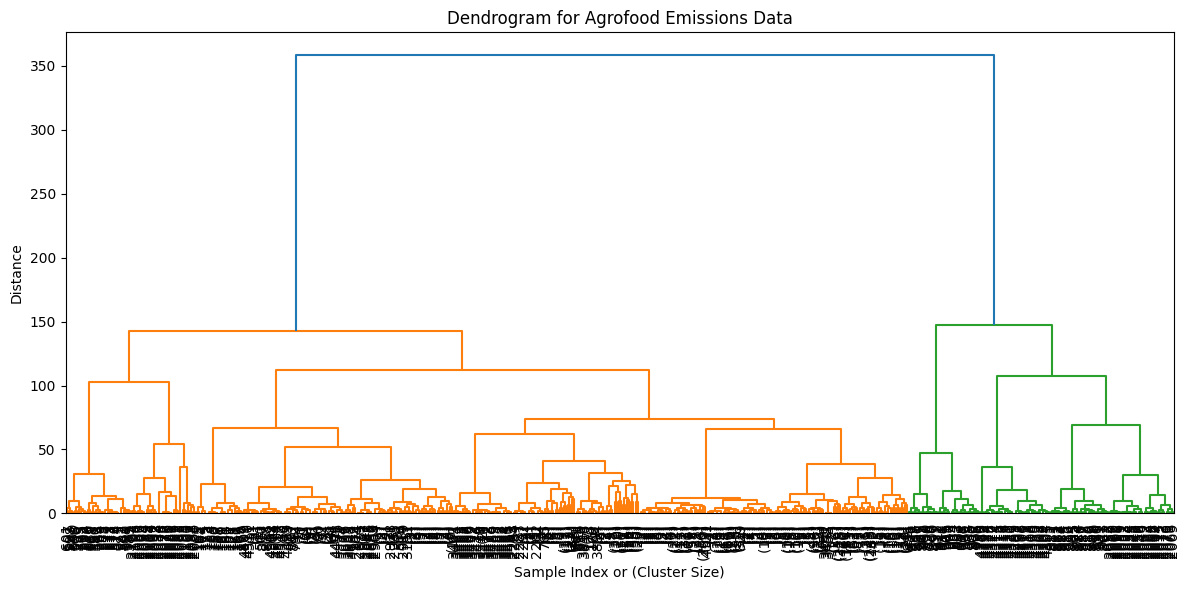

In [27]:
# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Compute linkage matrix (method='ward' is common)
linked = linkage(X_scaled, method='ward')

# Step 5: Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='level',  # 'lastp' or 'level'
           p=10,                   # number of levels to show
           leaf_rotation=90,
           leaf_font_size=10)
plt.title("Dendrogram for Agrofood Emissions Data")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

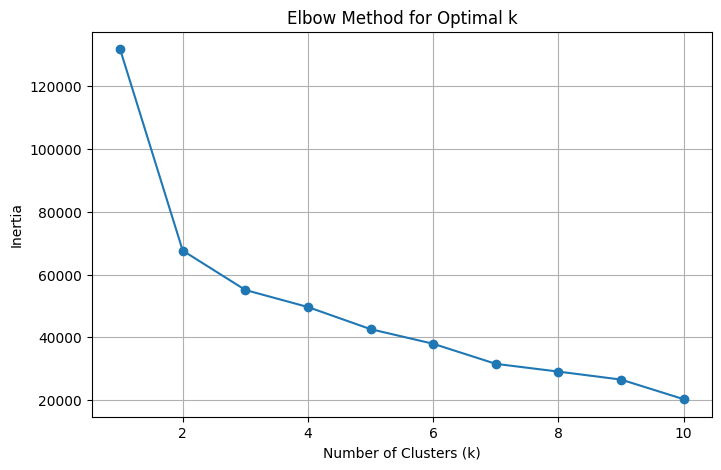

<ipython-input-29-4ce0db1e80d5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['KMeans_Cluster'] = clusters


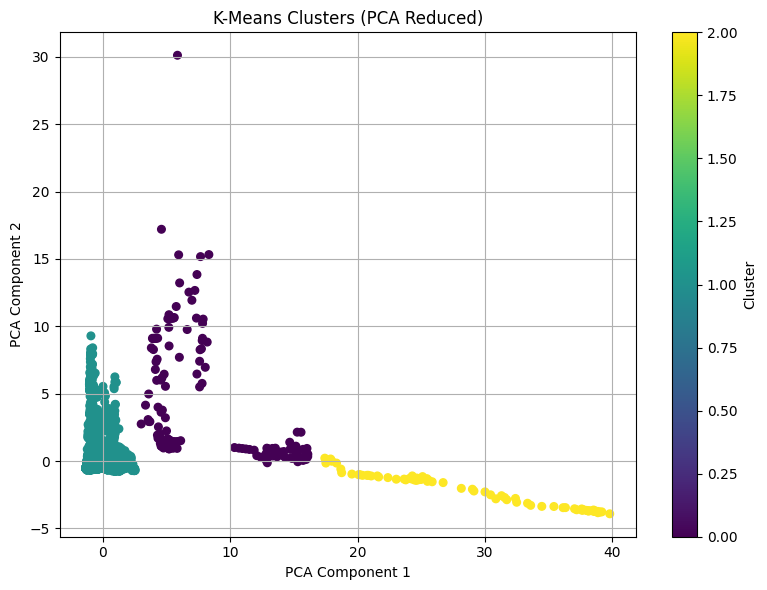

In [29]:
# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow method to find optimal number of clusters (optional)
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 5: Fit KMeans with chosen k (e.g., 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 6: Attach cluster labels to original data
df_cleaned['KMeans_Cluster'] = clusters

# Optional Step 7: Visualize in 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("K-Means Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()